**INITIALIZATION:**
- I use these three lines of code on top of my each notebooks because it will help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [1]:
#@ INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**LIBRARIES AND DEPENDENCIES:**
- I have downloaded all the libraries and dependencies required for the project in one particular cell.

In [3]:
#@ INSTALLING DEPENDENCIES: UNCOMMENT BELOW: 
# !pip install -Uqq fastbook
# import fastbook
# fastbook.setup_book()

In [41]:
#@ DOWNLOADING LIBRARIES AND DEPENDENCIES: 
from fastbook import *                                  # Getting all the Libraries. 
from fastai.callback.fp16 import *
from fastai.vision.all import *                         # Getting all the Libraries. 

**GETTING THE DATA:**
- I will download the [**Pets**](https://www.robots.ox.ac.uk/~vgg/data/pets/) dataset. 

In [5]:
#@ GETTING THE DATA: 
path = untar_data(URLs.PETS)                           # Getting Path to the Dataset. 
path.ls()                                              # Inspecting the Path. 

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

**Note:**
- The dataset provides images and annotations directories. The [**Pets**](https://www.robots.ox.ac.uk/~vgg/data/pets/) dataset website tells that the annotations directory contains information about where the pets are rather than what they are. Since it is a **Classification** rather than **Localization**, I will ignore the annotations directory for now. 

In [6]:
#@ INSPECTING IMAGES DIR: 
(path/"images").ls()                                    # Inspecting Images. 

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_24.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_193.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_5.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_139.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_49.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_181.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pug_79.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_51.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_66.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_36.jpg')...]

In [7]:
#@ GETTING ONE IMAGE: 
fname = (path/"images").ls()[0]                          # Getting an Image. 
re.findall(r"(.+)_\d+.jpg$", fname.name)                 # Extracting. 

['german_shorthaired']

**INITIALIZING DATABLOCK AND DATALOADERS:**

In [9]:
#@ INITIALIZING DATABLOCK: 
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),                        # Initializing DataBlock. 
                 get_items=get_image_files,                                 # Getting Image Files. 
                 splitter=RandomSplitter(seed=42),                          # Getting Random Splitting of Dataset. 
                 get_y=using_attr(RegexLabeller(r"(.+)_\d+.jpg$"),"name"),  # Getting Labels.  
                 item_tfms=Resize(460),                                     # Resizing Images. 
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))       # Batch Augmentation.

#@ INITIALIZING DATALOADERS: 
dls = pets.dataloaders(path/"images")                                       # Initializing DataLoaders. 

**Note:**
- I have used **Resize** as an item transform with a large size and **RandomResizedCrop** as a batch transform with a smaller size. **RandomResizedCrop** will be added if min scale parameter is passed in aug transforms function as was done in **DataBlock** call above. 

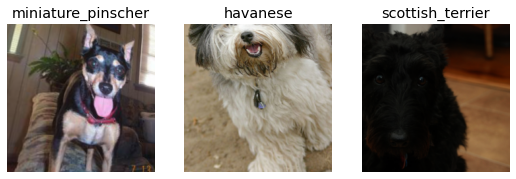

In [10]:
#@ INSPECTING IMAGES: 
dls.show_batch(nrows=1, ncols=3)                                             # Inspecting Images. 

**CHECKING AND DEBUGGING DATABLOCK:**


In [11]:
#@ INITIALIZING DATABLOCK: 
pets1 = DataBlock(blocks=(ImageBlock, CategoryBlock),                       # Initializing DataBlock. 
                 get_items=get_image_files,                                 # Getting Image Files. 
                 splitter=RandomSplitter(seed=42),                          # Getting Random Splitting of Dataset. 
                 get_y=using_attr(RegexLabeller(r"(.+)_\d+.jpg$"),"name"))  # Getting Labels. 

#@ INSPECTING SUMMARY: UNCOMMENT BELOW:
# pets1.summary(path/"images") 

**TRAINING THE MODEL:**

In [13]:
#@ TRAINING THE MODEL: INITIALI TEST: 
learn = cnn_learner(dls, resnet34, metrics=error_rate)                      # Initializing Pretrained Convolutions. 
learn.fine_tune(2)                                                          # Training the Model. 

epoch,train_loss,valid_loss,error_rate,time
0,1.544755,0.319217,0.104871,01:06


epoch,train_loss,valid_loss,error_rate,time
0,0.514410,0.340564,0.112991,01:11
1,0.324957,0.205011,0.066982,01:10


**CROSS ENTROPY LOSS:**
- **Cross Entropy Loss** is a loss function which works even when the dependent variable has more than two categories. It results faster and more reliable training. 

In [14]:
#@ INSPECTING ACTIVATIONS AND LABELS: 
x, y = dls.one_batch()                           # Getting a Batch of Data. 
y                                                # Inspecting Dependent Variable. 

TensorCategory([30, 27, 18, 29, 11, 25, 32, 13,  2, 16, 36, 11, 27,  1, 12, 20,  6,  0, 18,  7, 12, 36,  0,  7, 16, 27,  5, 11, 26, 21, 17,  7, 23, 16, 32, 28, 30, 19,  1, 17, 23, 19, 11, 19,  8, 10, 36, 31,
         5, 31,  5, 26, 27, 22,  1,  2,  1, 25, 33, 12,  2, 28, 11, 25], device='cuda:0')

In [15]:
#@ GETTING PREDICTIONS:
preds, _ = learn.get_preds(dl=[(x, y)])          # Getting Predictions. 
preds[0]                                         # Inspecting Predictions. 

tensor([8.7465e-06, 9.4804e-06, 2.6791e-04, 3.2518e-07, 2.7535e-06, 1.0035e-06, 2.6996e-06, 1.7669e-05, 1.7988e-05, 1.5116e-07, 1.7214e-05, 6.7672e-06, 2.9772e-05, 1.7872e-05, 1.5765e-03, 2.5608e-04,
        8.4853e-07, 2.4587e-06, 1.7042e-04, 5.0197e-04, 1.0197e-04, 7.5243e-03, 4.0268e-06, 3.0748e-05, 3.1106e-06, 1.2947e-03, 1.0599e-06, 1.7806e-05, 3.7723e-07, 2.2822e-06, 9.8800e-01, 2.7530e-05,
        5.2029e-06, 2.1078e-05, 7.9301e-06, 4.5035e-05, 2.8458e-06])

In [16]:
#@ INSPECTING PREDICTIONS: 
len(preds[0]), preds[0].sum()

(37, tensor(1.))

**SOFTMAX ACTIVATION FUNCTION:**
- Here, The **Softmax Activation Function** is used in the final layer to ensure that the activations are all between 0 and 1 and that they sum to 1. **Softmax** is similar to the **Sigmoid** function. 

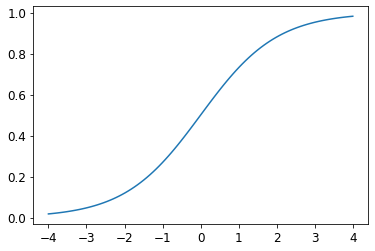

In [18]:
#@ INSPECTING SIGMOID FUNCTION: 
plot_function(torch.sigmoid, min=-4, max=4)             # Sigmoid Function. 

In [19]:
#@ EXAMPLE: 
acts = torch.randn((6, 2))*2                            # Random Numbers.
acts

tensor([[-1.5269,  3.5345],
        [ 0.2307,  4.2714],
        [ 2.8459, -2.9025],
        [ 0.8569,  2.5088],
        [ 1.2652,  0.1577],
        [ 1.6741, -0.1224]])

In [20]:
#@ GETTING SIGMOID: 
acts.sigmoid()                                         # Implementation of Sigmoid. 
(acts[:, 0] - acts[:, 1]).sigmoid()                    # Implementation of Sigmoid. 

tensor([0.0063, 0.0173, 0.9968, 0.1608, 0.7517, 0.8577])

In [21]:
#@ INITIALIZING SOFTMAX FUNCTION: 
def softmax(x):                                        # Defining Softmax Function. 
    return exp(x) / exp(x).sum(dim=1, keepdim=True)

**EXPONENTIAL FUNCTION**
- **Exponential Function** is defined as e\*\*x where e is a special number approximately equal to 2.718. It is the inverse of natural logarithm function. **Exponential Function** is always positive and increases very rapidly. 

In [22]:
#@ IMPLEMENTATION OF SOFTMAX FUNCTION: 
sm_acts = torch.softmax(acts, dim=1)                    # Implementation of Softmax. 
sm_acts

tensor([[0.0063, 0.9937],
        [0.0173, 0.9827],
        [0.9968, 0.0032],
        [0.1608, 0.8392],
        [0.7517, 0.2483],
        [0.8577, 0.1423]])

**Note:**
- **Softmax** is the multicategory equivalent of **Sigmoid**. 

**INITIALIZING LOG LIKELIHOOD**


In [23]:
#@ DEFINING THE FUNCTION: 
def mnist_loss(inputs, targets):                         # Initializing the Function. 
    inputs = inputs.sigmoid()                            # Initializing Sigmoid Activation. 
    return torch.where(targets==1, 1-inputs, inputs).\
           mean()                                        # Getting Mean of Loss. 

In [24]:
#@ EXAMPLE OF LABELS: 
targ = tensor([0, 1, 0, 1, 1, 0])                        # Initializing Tensor. 
idx = range(6)
sm_acts[idx, targ]                                       # Implementation. 

tensor([0.0063, 0.9827, 0.9968, 0.8392, 0.2483, 0.8577])

In [25]:
#@ IMPLEMENTATION OF NEGATIVE LOG LIKEHOOD: 
F.nll_loss(sm_acts, targ, reduction="none")              # Implementation. 

tensor([-0.0063, -0.9827, -0.9968, -0.8392, -0.2483, -0.8577])

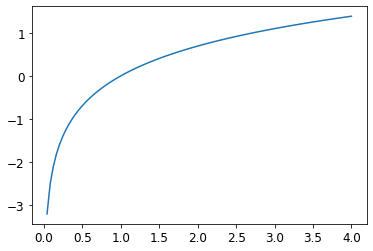

In [26]:
#@ INSPECTING LOGARITHMIC FUNCTION: 
plot_function(torch.log, min=0, max=4)                   # Inspection. 

**Note:**
- When we first take the **Softmax** and then the **Log Likelihood** of that, that combination is called **Cross Entropy Loss**. 

In [27]:
#@ INITIALIZING CROSS ENTROPY: 
loss_func = nn.CrossEntropyLoss()                       # Instantiation. 
loss_func(acts, targ)                                   # Getting Mean Loss.
F.cross_entropy(acts, targ)                             # Getting Mean Loss. 
nn.CrossEntropyLoss(reduction="none")(acts, targ)       # Getting Loss. 

tensor([5.0677e+00, 1.7432e-02, 3.1828e-03, 1.7536e-01, 1.3930e+00, 1.5348e-01])

**MODEL INTERPRETATION**

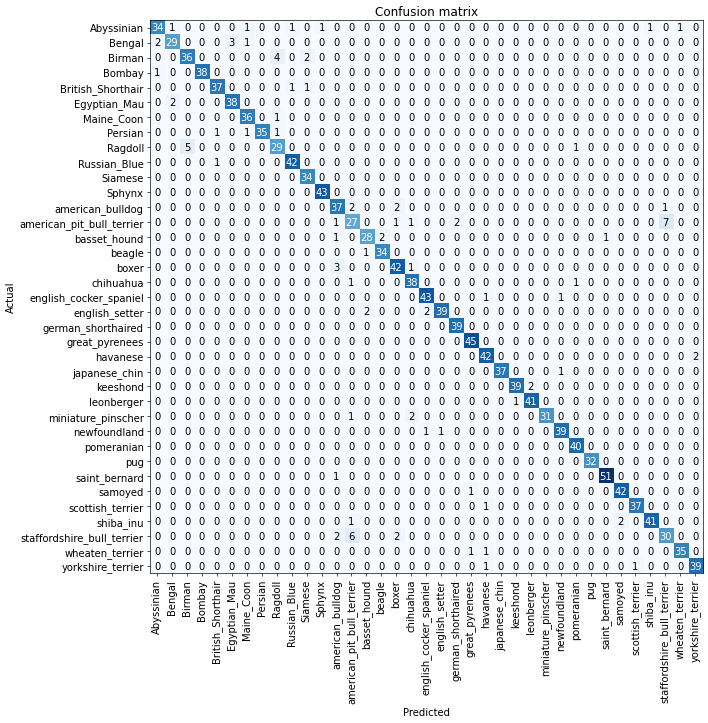

In [28]:
#@ GETTING CONFUSION MATRIX: 
interp = ClassificationInterpretation.from_learner(learn)       # Initializing Interpretation. 
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)          # Plotting Confusion Matrix. 

In [29]:
#@ GETTING MOST INCORRECT PREDICTIONS: 
interp.most_confused(min_val=3)                                 # Getting Confusion Matrix. 

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('Ragdoll', 'Birman', 5),
 ('Birman', 'Ragdoll', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('boxer', 'american_bulldog', 3)]

**THE LEARNING RATE FINDER**

In [30]:
#@ TRAINING THE MODEL: PRETRAINED MODEL: 
learn = cnn_learner(dls, resnet34, metrics=error_rate)          # Initializing Convolution Network. 
learn.fine_tune(1, base_lr=0.1)                                 # Training the Model with High LR. 

epoch,train_loss,valid_loss,error_rate,time
0,2.534288,4.832337,0.431664,01:07


epoch,train_loss,valid_loss,error_rate,time
0,4.139448,2.962262,0.723275,01:12


SuggestedLRs(valley=tensor(0.0007))

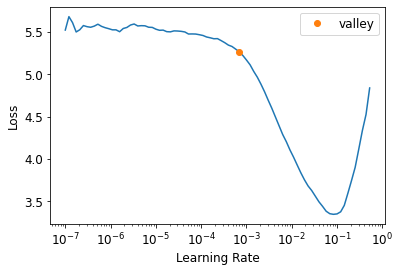

In [31]:
#@ TRAINING THE MODEL: PRETRAINED MODEL: 
learn = cnn_learner(dls, resnet34, metrics=error_rate)          # Initializing Convolution Network.
learn.lr_find()                                                 # Getting Learning Rate Finder. 

In [32]:
#@ TRAINING THE MODEL: PRETRAINED MODEL: 
learn = cnn_learner(dls, resnet34, metrics=error_rate)          # Initializing Convolution Network. 
learn.fine_tune(2, base_lr=0.0007)                              # Training the Model with Optimal. 

epoch,train_loss,valid_loss,error_rate,time
0,2.328156,0.455001,0.135318,01:07


epoch,train_loss,valid_loss,error_rate,time
0,0.679802,0.282029,0.092016,01:12
1,0.473484,0.232523,0.078484,01:14


**UNFREEZING AND TRANSFER LEARNING**

In [34]:
#@ TRANSFER LEARNING: 
learn = cnn_learner(dls, resnet34, metrics=error_rate)          # Initializing Convolution Network. 
learn.fit_one_cycle(3, 3e-3)                                    # Training the ModeL. 

epoch,train_loss,valid_loss,error_rate,time
0,1.135386,0.328948,0.109608,01:08
1,0.536832,0.245540,0.077808,01:07
2,0.329606,0.205333,0.067659,01:07


SuggestedLRs(valley=tensor(5.2481e-05))

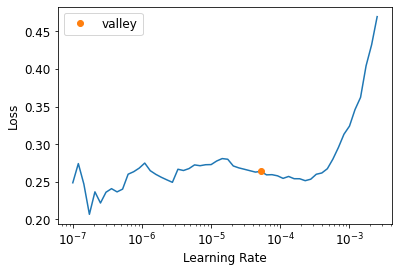

In [35]:
#@ UNFREEZING THE MODEL: 
learn.unfreeze()                                                # Initializing. 
learn.lr_find()                                                 # Learning Rate Finder. 

In [36]:
#@ TRAINING THE MODE: OPTIMAL LR: 
learn.fit_one_cycle(6, lr_max=5.2481e-05)                       # Training the Model. 

epoch,train_loss,valid_loss,error_rate,time
0,0.266990,0.203677,0.070365,01:11
1,0.242424,0.271477,0.080514,01:11
2,0.217706,0.213992,0.068336,01:12
3,0.155482,0.186154,0.054804,01:12
4,0.113909,0.175809,0.051421,01:12
5,0.103545,0.175556,0.051421,01:12


**DISCRIMINATIVE LEARNING RATES**

In [38]:
#@ TRANSFER LEARNING WITH DISCRIMINATIVE LR: 
learn = cnn_learner(dls, resnet34, metrics=error_rate)          # Initializing Convolution Network. 
learn.fit_one_cycle(3, 3e-3)                                    # Training the Model. 
learn.unfreeze()                                                # Unfreezing the Model. 
learn.fit_one_cycle(12, lr_max=slice(1e-6, 1e-4))               # Training the Model with Discriminative LR. 

epoch,train_loss,valid_loss,error_rate,time
0,1.149244,0.283402,0.096076,01:07
1,0.533338,0.236537,0.079838,01:07
2,0.336869,0.204236,0.073748,01:07


epoch,train_loss,valid_loss,error_rate,time
0,0.274398,0.200669,0.073748,01:12
1,0.264464,0.191375,0.066982,01:12
2,0.238416,0.184059,0.065629,01:12
3,0.197379,0.183401,0.056157,01:12
4,0.189030,0.189514,0.064276,01:12
5,0.174088,0.181705,0.060893,01:12
6,0.165469,0.179625,0.060217,01:12
7,0.150223,0.175498,0.055480,01:12
8,0.140641,0.172037,0.054127,01:12
9,0.130608,0.171378,0.054804,01:12


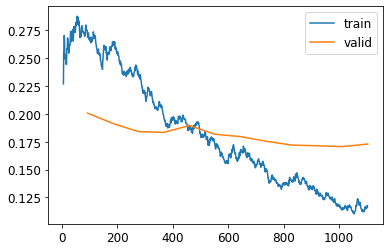

In [39]:
#@ INSPECTING LOSS: 
learn.recorder.plot_loss()                                       # Plotting Loss. 

In [43]:
#@ DEEPER ARCHITECTURES: 
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()     # Initializing Convolutions. 
learn.fine_tune(6, freeze_epochs=3)                                  # Training the Model. 

epoch,train_loss,valid_loss,error_rate,time
0,1.302799,0.290259,0.090663,01:05
1,0.596495,0.297528,0.092693,01:05
2,0.428140,0.243949,0.072395,01:05


epoch,train_loss,valid_loss,error_rate,time
0,0.291679,0.209903,0.066982,01:07
1,0.321304,0.296716,0.094046,01:07
2,0.243036,0.263892,0.085250,01:07
3,0.160504,0.217076,0.067659,01:07
4,0.088087,0.196925,0.056157,01:08
5,0.052237,0.194437,0.057510,01:08
